In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import levene,ttest_ind
from statsmodels.stats.proportion import proportions_ztest as zprop

import warnings
warnings.simplefilter('ignore')

In [4]:
df=pd.read_csv('music.csv',index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,50,440247,False,0.369,0.598,7,-6.984,1.0,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4.0,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,11,93933,False,0.171,0.997,7,-3.586,1.0,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4.0,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",0,213578,False,0.173,0.803,9,-10.071,0.0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3.0,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,0,151387,False,0.683,0.511,6,-5.598,1.0,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3.0,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,57,236293,False,0.555,0.941,9,-3.294,0.0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4.0,j-idol


# 1- How do key musical features like danceability, energy,acousticness, and valence differ across various genres?

Top 8 genres danceability wise
       track_genre  danceability
66            kids      0.770604
88          reggae      0.764694
68          latino      0.762525
13   chicago-house      0.762019
21       dancehall      0.755333
51         hip-hop      0.751019
89       reggaeton      0.747463
73  minimal-techno      0.724740
Top 8 genres energy wise
    track_genre    energy
42    grindcore  0.938412
22  death-metal  0.935611
46        happy  0.924729
78        party  0.905180
72    metalcore  0.904217
49    hardstyle  0.901936
61       j-idol  0.900830
6   black-metal  0.886667
Top 8 genres acousticness wise
    track_genre  acousticness
16    classical      0.927434
75      new-age      0.877923
93      romance      0.863456
108       tango      0.838597
76        opera      0.791907
52   honky-tonk      0.783814
18       comedy      0.774044
4       ambient      0.770657
Top 8 genres valence wise
    track_genre   valence
95        salsa  0.825159
25        disco  0.744723
35      

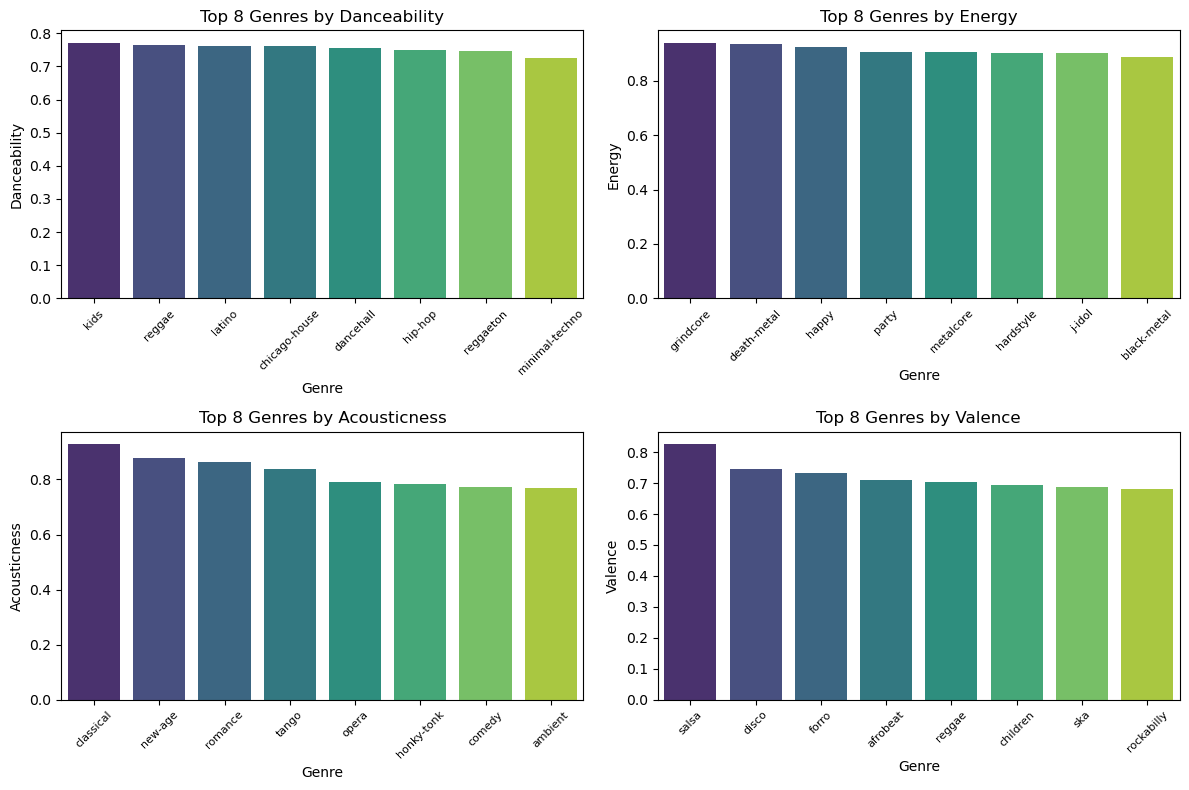

In [5]:
cols = ['danceability', 'energy', 'acousticness', 'valence']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(cols):
    grouped_df = df.groupby('track_genre', as_index=False)[col].mean().sort_values(col, ascending=False)
    top_values = grouped_df.head(8)
    print(f'Top 8 genres {col} wise')
    print(top_values)

    sns.barplot(x='track_genre', y=col, data=top_values, ax=axes[i], palette='viridis')
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel(col.capitalize())
    axes[i].set_title(f'Top 8 Genres by {col.capitalize()}')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

# 2- How does the presence of explicit content relate to other track features, such as popularity, danceability, or energy?

TtestResult(statistic=3.0636022181597258, pvalue=0.0011480361650857604, df=539.7081207866398)
(3.348652970074134, 0.0004060271954686771)
(3.3966307511376894, 0.0003411047813669148)


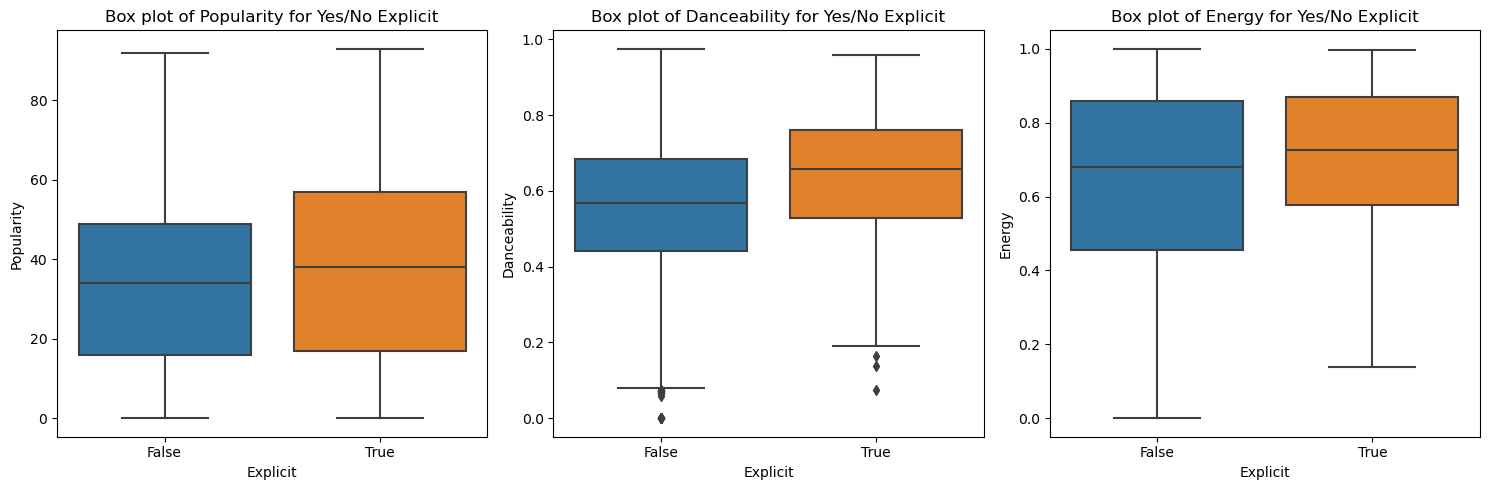

In [6]:
cols = ['popularity', 'danceability', 'energy']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(cols):
    Y = df[df['explicit']][col]
    N = df[~df['explicit']][col]

    # Check for equal variance assumption using Levene's test
    eqvar = True
    if levene(Y, N).pvalue < 0.05:
        eqvar = False
    if i==0:
        ttest_result = ttest_ind(Y, N, equal_var=eqvar,alternative='greater')
        print(ttest_result)
    else:
        n1,n2=len(Y),len(N)
        p1,p2=Y.mean(),N.mean()
        ztest_result=zprop([np.round(n1*p1),np.round(n2*p2)],[n1,n2],alternative='larger')
        print(ztest_result)

    sns.boxplot(data=df, x='explicit', y=col, ax=axes[i])
    axes[i].set_xlabel('Explicit')
    axes[i].set_ylabel(col.capitalize())
    axes[i].set_title(f'Box plot of {col.capitalize()} for Yes/No Explicit')

plt.tight_layout()
plt.show()

## Pvalue is low for 2 sample independent ttest for Popularity  and 2sample  zprop test for Danceability and Energy.
## Also supported by the boxplots we can conclude that Explicit contents have higher Popularity,Danceability and Energy.

# 3- Are certain musical features more common in tracks with specific time signatures?

In [7]:
mode_df = df[['artists','album_name','popularity','explicit','track_genre','time_signature']].groupby('time_signature').agg(lambda x: x.mode().iloc[0])
print('Most common values for columns for each time signatures : ')
mode_df

Most common values for columns for each time signatures : 


,artists,album_name,popularity,explicit,track_genre
time_signature,,,,,
0.0,Deep Sleep Hair Dryers;Hair Dryers for Backgro...,"Rain Drop Medley of Roof, Thunder, Forest, Car...",33,False,sleep
1.0,Little Symphony,Serenity,0,False,sleep
3.0,Oleg Pogudin,Metal,0,False,romance
4.0,Ella Fitzgerald,Metal,0,False,grindcore
5.0,Lorne Balfe,Mission: Impossible - Fallout (Music from the ...,0,False,dancehall
